<h1>Лабораторная работа 5. Решение ОДУ</h1>

В данной лабораторной работе будет рассмотрена работа методов Рунге-Кутта 4 порядка и Адамса 4 порядка для решения ОДУ 1 порядка

Сначала реализуем сами методы на языке Python:

In [1]:
import math
import matplotlib.pyplot as plt
import numpy

def RungeKutt4(f, x0, y0, xn, n):
    h = (xn - x0) / n
    y = [y0]
    x = [x0]
    xi = x0
    yi = y0
    for i in range(n):
        k0 = f(xi, yi)
        k1 = f(xi + h / 2, yi + h / 2 * k0)
        k2 = f(xi + h / 2, yi + h / 2 * k1)
        k3 = f(xi + h, yi + h * k2)
        yi = yi + h / 6 * (k0 + 2 * k1 + 2 * k2 + k3)
        y.append(yi)
        xi += h
        x.append(xi)
    return x, y


def Adams4(f, x0, y0, xn, n):
    h = (xn - x0) / n
    y = [y0]
    x = [x0]
    xi = x0
    yi = y0
    fl = [f(x0, y0)]
    for i in range(3):
        k0 = f(xi, yi)
        k1 = f(xi + h / 2, yi + h / 2 * k0)
        k2 = f(xi + h / 2, yi + h / 2 * k1)
        k3 = f(xi + h, yi + h * k2)
        yi = yi + h / 6 * (k0 + 2 * k1 + 2 * k2 + k3)
        y.append(yi)
        xi += h
        x.append(xi)
        fl.append(f(xi, yi))

    for i in range(3, n):
        yi = yi + h / 24 * (55 * fl[i] - 59 * fl[i - 1] + 37 * fl[i - 2] - 9 * fl[i - 3])
        xi += h
        y.append(yi)
        x.append(xi)
        fl.append(f(xi, yi))

    return x, y

Теперь протестируем их работу на следующей задаче Коши:

y' = y * cos(x)

y(0) = 1

Аналитическим решением которого будет являться функция

y = e ^ sin(x)

Объявим функцию диффура и функцию аналитического решения:

In [2]:
def func(x, y):
    return y * math.cos(x)


def analytic_sol(x):
    return math.e ** math.sin(x)

Сравним графики решений, полученных этими методами с аналитическим решением:

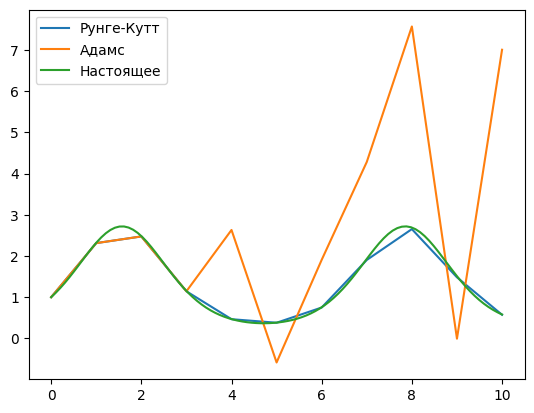

In [3]:
n = 10
x0 = 0
y0 = 1
yn = 10
xR, yR = RungeKutt4(func, x0, y0, yn, n)
_, yA = Adams4(func, x0, y0, yn, n)
x2 = numpy.linspace(x0, 10, 100)
plt.plot(xR, yR, label='Рунге-Кутт')
plt.plot(xR, yA, label='Адамс')
plt.plot(x2, [analytic_sol(xx) for xx in x2], label='Настоящее')
plt.legend()
plt.show()

Как видно из решения, метод Адамса в точках, идущих дальше 4 (первые 4 совпадают с методом Рунге-Кутта) имеет довольно большую погрешность, в то время как решения методом Рунге-Кутта практически точное. Теперь посмотрим, насколько точно методы будут работать при увеличении количества точек 

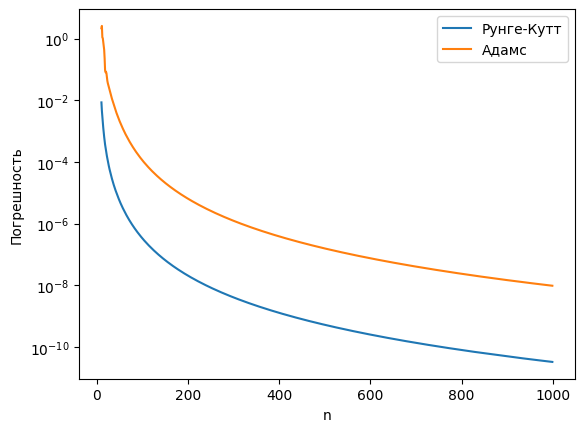

In [6]:
N = list(range(10, 1000))

dR = []
dA = []
for n0 in N:
    xR0, yR0 = RungeKutt4(func, x0, y0, yn, n0)
    _, yA0 = Adams4(func, x0, y0, yn, n0)
    yAn0 = [analytic_sol(xx) for xx in xR0]
    dR0 = [abs((yAn0[i] - yR0[i])/yAn0[i]) for i in range(len(xR0))]
    dA0 = [abs((yAn0[i] - yA0[i])/yAn0[i]) for i in range(len(xR0))]
    dR.append(sum(dR0)/len(dR0))
    dA.append(sum(dA0)/len(dA0))
    
plt.plot(N, dR, label='Рунге-Кутт')
plt.plot(N, dA, label='Адамс')
plt.xlabel('n')
plt.yscale('log')
plt.ylabel('Погрешность')
plt.legend()
plt.show()

Если более подробно рассмотреть конец отрезка:

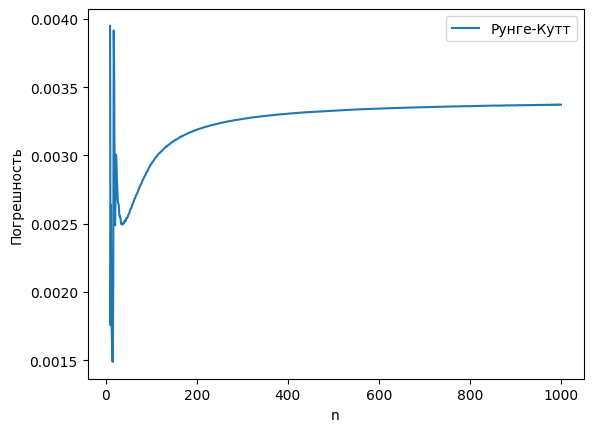

In [8]:
plt.plot(N, [dR[i]/dA[i] for i in range(len(N))], label='Рунге-Кутт')
plt.xlabel('n')
plt.ylabel('Погрешность')
plt.legend()
plt.show()